In [876]:
# basic python tools for numbers and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# statistics tools
import scipy.stats as stats
import statistics 

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier

# other tools
from functools import reduce
from imblearn.over_sampling import SMOTE
import itertools
import copy

# Clear warnings
import warnings
warnings.filterwarnings('ignore') 

# show plots inline
%matplotlib inline

## 0. Load data

In [877]:
df0 = pd.read_csv('Diabetes Project Part 2.csv')
df = df0.copy(deep=True)
df.head()

,12drinksayear,5drinks2hours,5drinksaday,BMI,LDL,age,diabetes,fasting_glucose,race,sitting,sleeping,sugar,male,female,sysBP,diaBP
0,1.0,-0.145691,1.0,0.228706,3.0,0.238124,0.0,-0.305181,3.0,-0.346925,1.779442e-01,-0.748791,1,0,0.861028,1.443065
1,1.0,-0.145691,1.0,-0.059931,2.0,1.591575,1.0,-0.722354,3.0,0.545482,-4.540141e-01,-0.177046,1,0,0.598762,-1.928683
2,0.0,-0.145691,0.0,-1.286642,2.0,-0.357394,0.0,-0.722354,4.0,0.842950,-1.122584e-15,0.596492,0,1,-1.162165,-0.712643
3,0.0,-0.145691,0.0,-0.088795,2.0,1.266747,0.0,-0.152666,1.0,-1.784690,8.099026e-01,-1.206187,0,1,-0.300435,-0.823192
4,1.0,-0.145691,1.0,-0.175387,2.0,-1.440155,0.0,-0.448724,4.0,0.842950,-7.699933e-01,-0.523456,1,0,-0.750033,0.337574


## 1. Split data into train & test sets


In [878]:
def simple_split(X,y,test_size):
    print()
    print('simple split')
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 2)
    return X_train, X_test, y_train, y_test

* Cross validation:

    1. K fold: 
        * For classification problems, stratified sampling is recommended for creating the folds. Each response class should be represented with equal proportions in each of the K fold. Each cross-validation fold should consist of exactly 20% db. Scikit-learn's cross_val_score function does stratified sampling by default. StratifiedKFold - different from oversampling issue. 
        * Need to perform SMOTE within each fold. Accordingly, you need to avoid train_test_split in favour of KFold(set the value for the test_size parameter to 0 if want to call fn above)
    2. Leave one out
          * K-fold cross validation taken to its logical extreme, with K equal to N, the number of data points in the set


In [879]:
def kfold_split(X, y, model): 
    print('kfold split')
    test_accuracies = []
    train_accuracies = []
    kf = KFold(n_splits=10)
    
    # 1. Split into test and train sets
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # 2. Oversample y - SMOTE
        X_train, X_test, y_train, y_test = implement_SMOTE(X_train, X_test, y_train, y_test)
        
        # 3. ML models
        test_accuracy, train_accuracy = get_predictions(X_train, X_test, y_train, y_test, model, split_method='kfold')
        test_accuracies.append(test_accuracy)
        train_accuracies.append(train_accuracy)

    test_mean_accuracy = statistics.mean(test_accuracies)
    test_std = statistics.stdev(test_accuracies)
    train_mean_accuracy = statistics.mean(train_accuracies)
    train_std = statistics.stdev(train_accuracies)
    print('Test Mean accuracy:',test_mean_accuracy)
    print('Train Mean accuracy:',train_mean_accuracy)

#     print('Test accuracies:',test_accuracies)
#     print('Test_std:',test_std)  
#     print('Train_std:',train_std) 
    

In [880]:
def stratified_kfold_split(X, y, model): 
    print()
    print('stratified kfold split')
    test_accuracies = []
    train_accuracies = []
    skf = StratifiedKFold(n_splits=10)
    
    # 1. Split into test and train sets
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # 2. Oversample y - SMOTE
        X_train, X_test, y_train, y_test = implement_SMOTE(X_train, X_test, y_train, y_test)
        
        # 3. ML models
        test_accuracy, train_accuracy = get_predictions(X_train, X_test, y_train, y_test, model, split_method='kfold')
        test_accuracies.append(test_accuracy)
        train_accuracies.append(train_accuracy)

    test_mean_accuracy = statistics.mean(test_accuracies)
    test_std = statistics.stdev(test_accuracies)
    train_mean_accuracy = statistics.mean(train_accuracies)
    train_std = statistics.stdev(train_accuracies)
    print('Test Mean accuracy:',test_mean_accuracy)
    print('Train Mean accuracy:',train_mean_accuracy)

#     print('Test accuracies:',test_accuracies)
#     print('Test_std:',test_std)  
#     print('Train_std:',train_std)

In [881]:
# def leave_one_out_split():
#     return 

## 2. Oversample [y] - SMOTE

The dependent variable 'diabetes' is imbalanced. If we train a model without fixing this problem, the model will be completely biased.

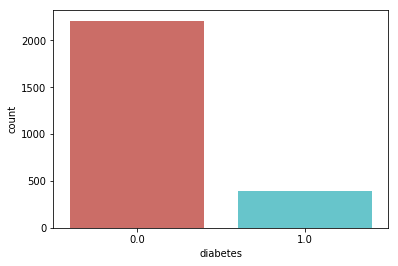

In [882]:
sns.countplot(x="diabetes",data=df0,palette='hls')

* ### SMOTE
SMOTE (Synthetic Minority Over-sampling Technique). In simple terms, it looks at the feature space for the minority class data points and considers its k nearest neighbours. If we don't deal with the disproportionate ratio, the model will consider diabetes samples (~20%) as trivial and predict them as healthy. If so, the model can still have high accuracy (~0.8) but it's fake accuracy 
* training set expands after oversampling


In [883]:
def implement_SMOTE(X_train, X_test, y_train, y_test):
    sm = SMOTE(random_state=2)
    X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train.ravel())
    
#     print('Before OverSampling: yes diabetes - ', sum(y_train==1),'   no diabetes - ',sum(y_train==0))
#     print('After OverSampling:  yes diabetes - ', sum(y_train_oversampled==1),'  no diabetes - ',sum(y_train_oversampled==0))
    
    return X_train_oversampled, X_test, y_train_oversampled, y_test

## 3. Machine learning models

In [884]:
def build_clf(model):
    if model == 'logistic regression': 
        clf = LogisticRegression(C=9,dual=False)
    elif model == 'knn':
        clf = KNeighborsClassifier(n_neighbors = 3) 
    elif model == 'SVC':
        clf = SVC(probability=True)
    elif model == 'random forest':
        clf = RandomForestClassifier(n_estimators=500) 
    elif model == 'linear SVC':
        clf = LinearSVC(C=1000,dual=False)
    else:
        print('This model is not included yet. Add this model now!')
    return clf

In [885]:
def get_predictions(X_train, X_test, y_train, y_test, model, split_method):
    clf = build_clf(model)
    clf = clf.fit(X_train,y_train)                
    y_train_predictions = clf.predict(X_train)
    y_test_predictions = clf.predict(X_test)
    
    test_accuracy = clf.score(X_test, y_test)
    train_accuracy = clf.score(X_train, y_train)
    
    if split_method == 'kfold' or split_method == 'stratified kfold':
        return test_accuracy, train_accuracy
    elif split_method == 'simple':
        print('Testing set accuracy:', test_accuracy)
        print('Training set accuracy:', train_accuracy)
        print() 
        return clf, y_test_predictions
    else:
        print('split method not defined')

## 4. Analysis

        # probability = clf.predict_proba(X_test)[:, 1] 
        
- Probability of having diabetes for each participant. What is threshold for the probability above which we classify as having diabetes? It seems reasonable, at least at first, to take the threshold to be 0.5. Use ROC to visualize how the performance of the classifier changes as we vary the threshold.
- threshold = 0: all participants are classified as having diabetes. No false negatives (FN: have db but classified as healthy) - recall/TPR = 1. No true negatives (TN: healthy classified as healthy) - FPR = 1 -> TOP RIGHT OF THE ROC CURVE
- threshold = 1: BOTTOM LEFT OF THE ROC CURVE
- TP rate is 1 and the FP rate is 0 — that is, no diabetes patients are classified as healthy people and no healthy people are classified as diabetes patients. This is the point of perfect classification.
                    


In [886]:
def plot_roc_curve(y_test,y_test_predictions,model,probability):
    roc_auc = roc_auc_score(y_test, y_test_predictions)
    fpr, tpr, thresholds = roc_curve(y_test, probability)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model + '  --  AUC: = %0.2f' % roc_auc)
    plt.legend(['ROC','Completely random'],loc="lower right")
    plt.show()

def plot_confusion_matrix(y_test, y_test_predictions):
    cm = confusion_matrix(y_test, y_test_predictions)
    print('Confusion matrix:')
    print(cm)
    
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [887]:
def analysis(X_test, y_test, y_test_predictions, model, clf):
    # confusion matrix
    plot_confusion_matrix(y_test, y_test_predictions)
    
    # ROC - AUC
    if model == 'linear SVC': # linear SVC has no predict_proba
        pass                  
    else: 
        probability = clf.predict_proba(X_test)[:, 1] 
        plot_roc_curve(y_test,y_test_predictions,model,probability)
    
    # Classification report
    print(classification_report(y_test, y_test_predictions))


## 5. MAIN

In [888]:
def main(df, model, split_method):
    y = df['diabetes'].values
    X = df.drop(['diabetes'],axis = 1).values
    
    #### 1. Split data 
    #### 2. Oversample - y
    #### 3. Modeling
    #### 4. Analysis
    
    if split_method == 'simple':
        X_train, X_test, y_train, y_test = simple_split(X,y,test_size=0.2)
        X_train, X_test, y_train, y_test = implement_SMOTE(X_train, X_test, y_train, y_test)
        clf, y_test_predictions = get_predictions(X_train, X_test, y_train, y_test, model, split_method)
        analysis(X_test, y_test, y_test_predictions, model, clf)
        
    elif split_method == 'kfold':
        kfold_split(X, y, model)
    elif split_method == 'stratified kfold':
        stratified_kfold_split(X, y, model)
    
    else: print('split_method is not defined...')

# RUN


#### Logistic regression
- Remove correlated variables

kfold split
Test Mean accuracy: 0.8403846153846154
Train Mean accuracy: 0.8395651559091446

stratified kfold split
Test Mean accuracy: 0.8361538461538461
Train Mean accuracy: 0.8401709401709402

simple split
Testing set accuracy: 0.8461538461538461
Training set accuracy: 0.8291245791245792

Confusion matrix:
[[365  63]
 [ 17  75]]


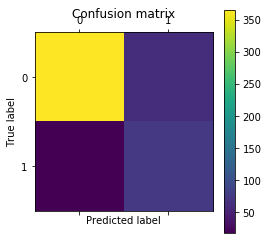

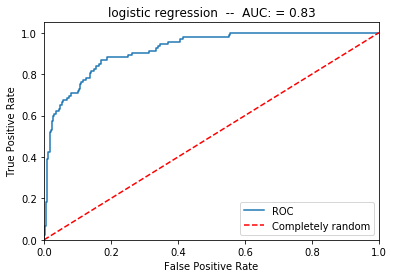

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90       428
         1.0       0.54      0.82      0.65        92

   micro avg       0.85      0.85      0.85       520
   macro avg       0.75      0.83      0.78       520
weighted avg       0.88      0.85      0.86       520



In [889]:
main(df,'logistic regression',split_method = 'kfold')
main(df,'logistic regression',split_method = 'stratified kfold')
main(df,'logistic regression',split_method = 'simple')

kfold split
Test Mean accuracy: 0.8042307692307692
Train Mean accuracy: 0.9534676504737902

stratified kfold split
Test Mean accuracy: 0.8088461538461538
Train Mean accuracy: 0.9538712921065863

simple split
Testing set accuracy: 0.8192307692307692
Training set accuracy: 0.952020202020202

Confusion matrix:
[[367  61]
 [ 33  59]]


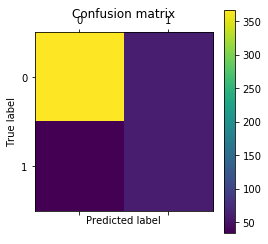

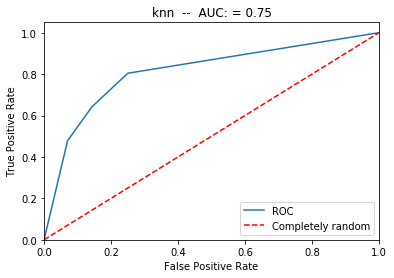

              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       428
         1.0       0.49      0.64      0.56        92

   micro avg       0.82      0.82      0.82       520
   macro avg       0.70      0.75      0.72       520
weighted avg       0.84      0.82      0.83       520



In [890]:
main(df,'knn',split_method = 'kfold')
main(df,'knn',split_method = 'stratified kfold')
main(df,'knn',split_method = 'simple')

kfold split
Test Mean accuracy: 0.855
Train Mean accuracy: 0.9098493509487509

stratified kfold split
Test Mean accuracy: 0.85
Train Mean accuracy: 0.9076671694318753

simple split
Testing set accuracy: 0.8557692307692307
Training set accuracy: 0.9118967452300786

Confusion matrix:
[[379  49]
 [ 26  66]]


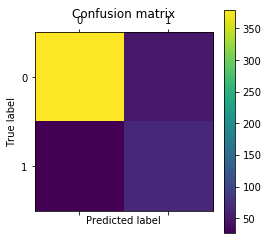

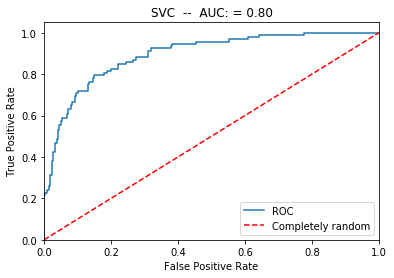

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91       428
         1.0       0.57      0.72      0.64        92

   micro avg       0.86      0.86      0.86       520
   macro avg       0.75      0.80      0.77       520
weighted avg       0.87      0.86      0.86       520



In [891]:
main(df,'SVC',split_method = 'kfold')
main(df,'SVC',split_method = 'stratified kfold')
main(df,'SVC',split_method = 'simple')

kfold split
Test Mean accuracy: 0.8996153846153846
Train Mean accuracy: 1.0

stratified kfold split
Test Mean accuracy: 0.8992307692307693
Train Mean accuracy: 1.0

simple split
Testing set accuracy: 0.8980769230769231
Training set accuracy: 1.0

Confusion matrix:
[[407  21]
 [ 32  60]]


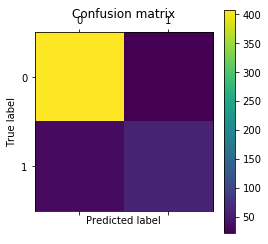

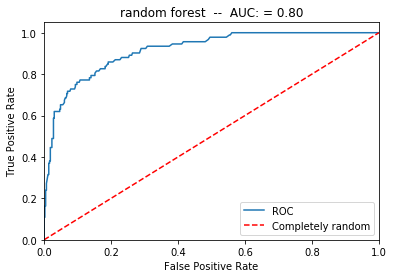

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       428
         1.0       0.74      0.65      0.69        92

   micro avg       0.90      0.90      0.90       520
   macro avg       0.83      0.80      0.82       520
weighted avg       0.89      0.90      0.90       520



In [892]:
main(df,'random forest',split_method = 'kfold')
main(df,'random forest',split_method = 'stratified kfold')
main(df,'random forest',split_method = 'simple')

kfold split
Test Mean accuracy: 0.838076923076923
Train Mean accuracy: 0.8378301993649531

stratified kfold split
Test Mean accuracy: 0.8323076923076923
Train Mean accuracy: 0.8373051784816491

simple split
Testing set accuracy: 0.8480769230769231
Training set accuracy: 0.8265993265993266

Confusion matrix:
[[366  62]
 [ 17  75]]


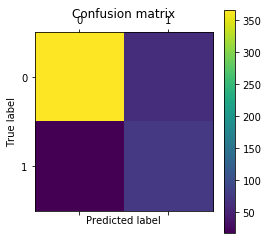

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.90       428
         1.0       0.55      0.82      0.66        92

   micro avg       0.85      0.85      0.85       520
   macro avg       0.75      0.84      0.78       520
weighted avg       0.88      0.85      0.86       520



In [893]:
main(df,'linear SVC',split_method = 'kfold')
main(df,'linear SVC',split_method = 'stratified kfold')
main(df,'linear SVC',split_method = 'simple')